In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn import metrics


In [2]:
train=pd.read_csv(r"D:\DataScience\Project\Analytics_Vidya\LoanPrediction\Dataset\train_ctrUa4K.csv") 
test=pd.read_csv(r"D:\DataScience\Project\Analytics_Vidya\LoanPrediction\Dataset\test_lAUu6dG.csv")

In [3]:
train_original=train.copy() 
test_original=test.copy()

In [4]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train.shape, test.shape

((614, 13), (367, 12))

## Explanatory Data Analysis

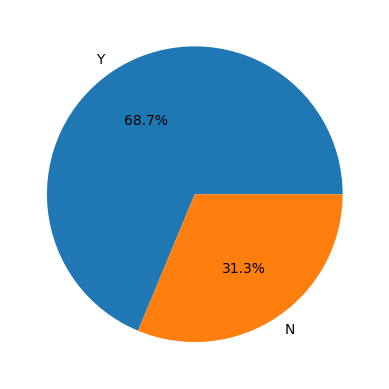

In [6]:
temp = train['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()


## Univariate Analysis

# Target Variable


In [7]:

train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
# Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot: >

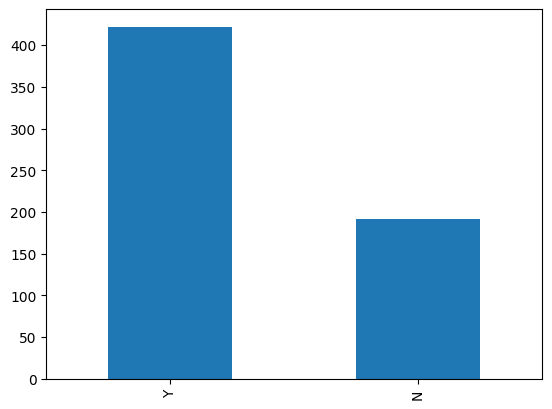

In [9]:
train['Loan_Status'].value_counts().plot.bar()

# categorical independant variable

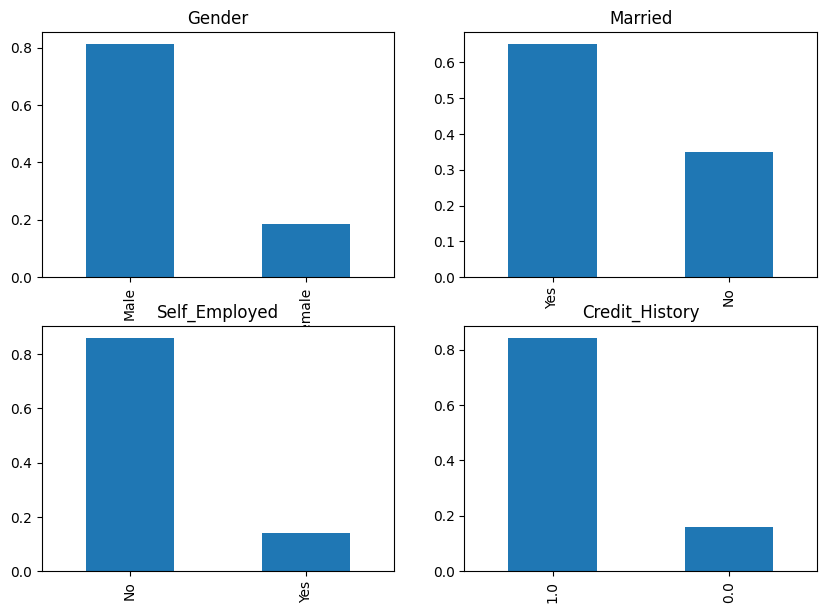

In [10]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,7), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

# ordinal independant variable

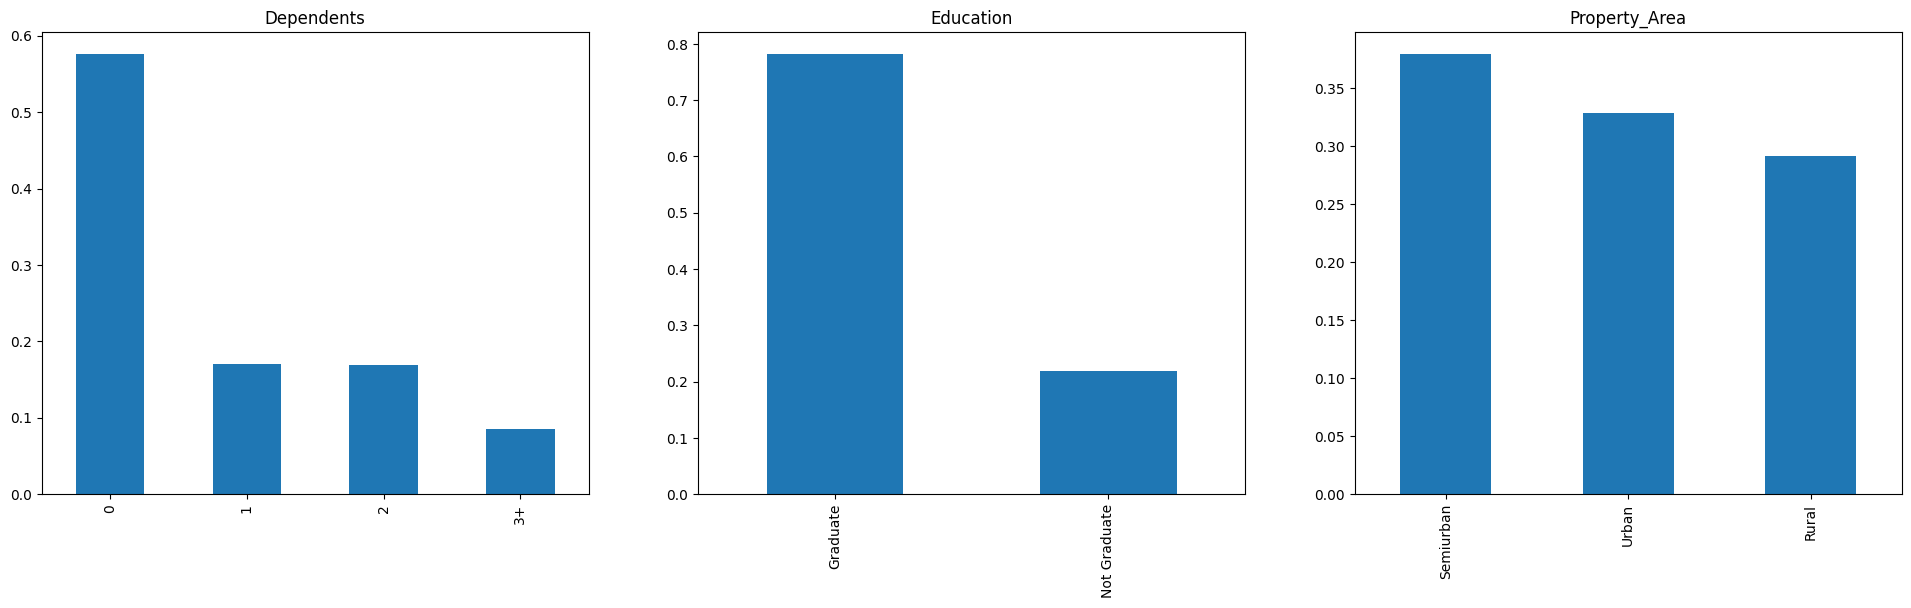

In [11]:
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()


<AxesSubplot: xlabel='Loan_Status'>

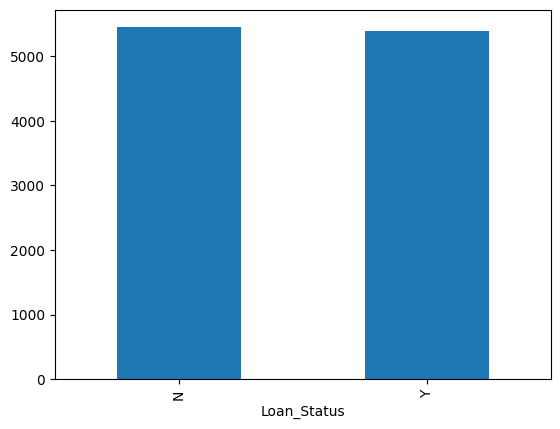

In [12]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


# Independent Variable (Numerical)

C:\Users\91890\AppData\Local\Temp\ipykernel_19660\1968676989.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome']);


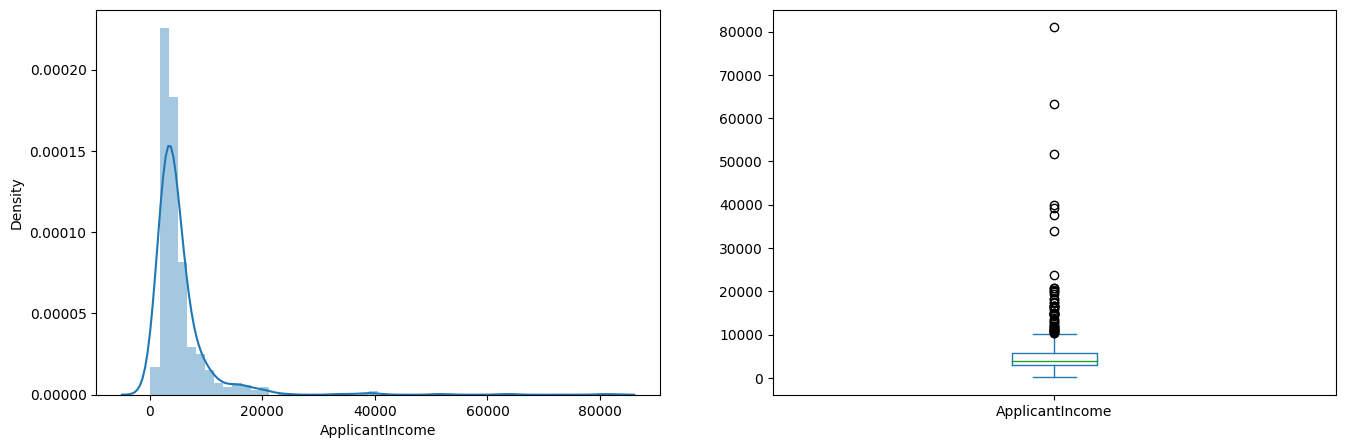

In [13]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

## Bivariate Analysis


# Categorical Independent Variable vs Target Variable

<AxesSubplot: xlabel='Gender'>

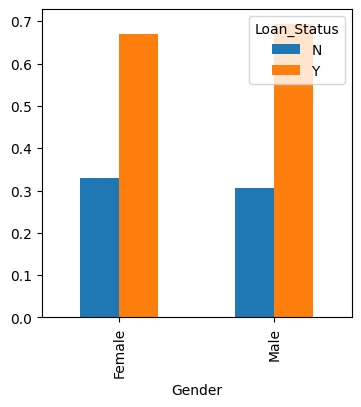

In [14]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

# visualize the remaining categorical variables vs the target variables

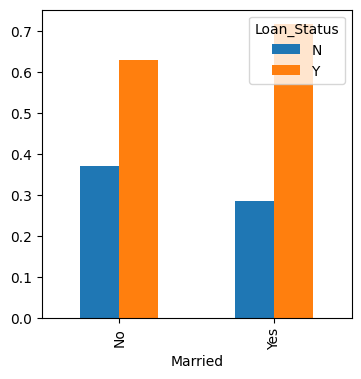

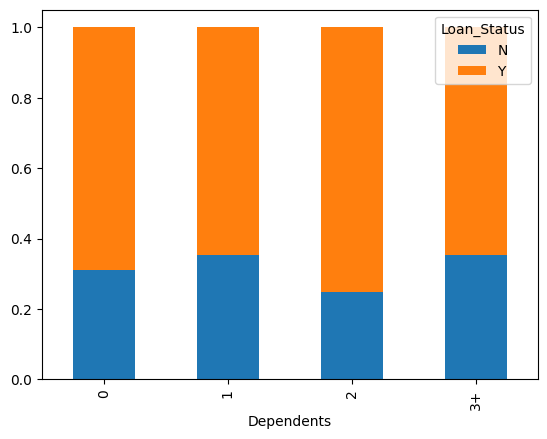

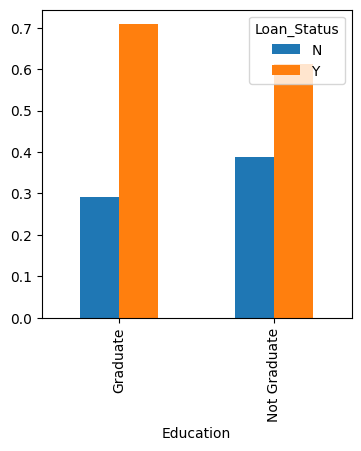

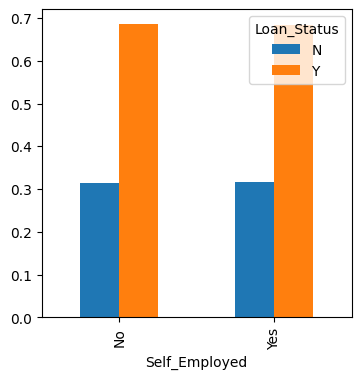

In [15]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()

# relationship between the remaining categorical independent variables and Loan_Status.

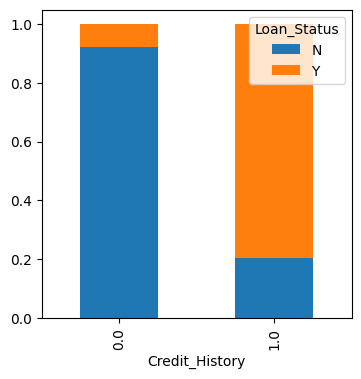

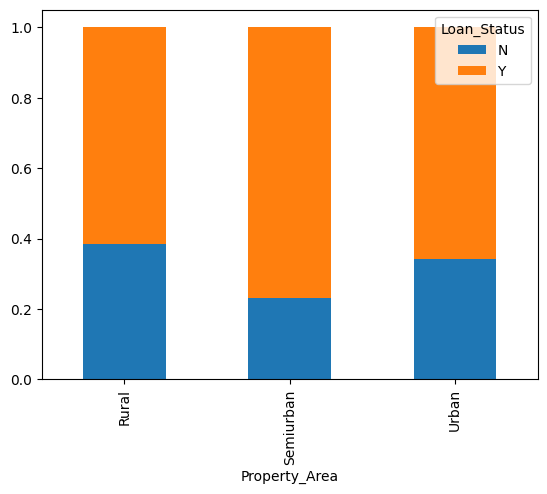

In [16]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

# Numerical Independent Variable vs Target Variable

<AxesSubplot: xlabel='Loan_Status'>

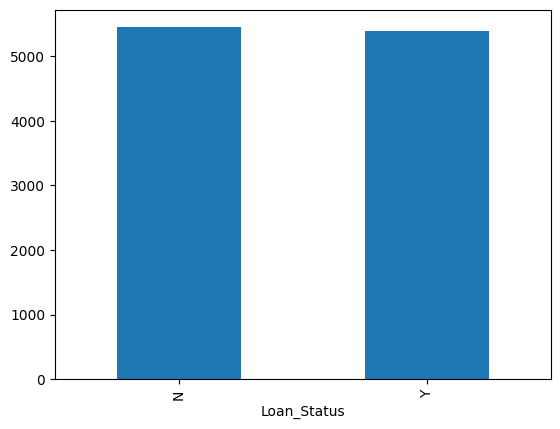

In [17]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

## Missing Value and Outlier Treatment


In [18]:
train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [20]:
train.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
train['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)


In [23]:
train.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


In [25]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [27]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# outlier treatment

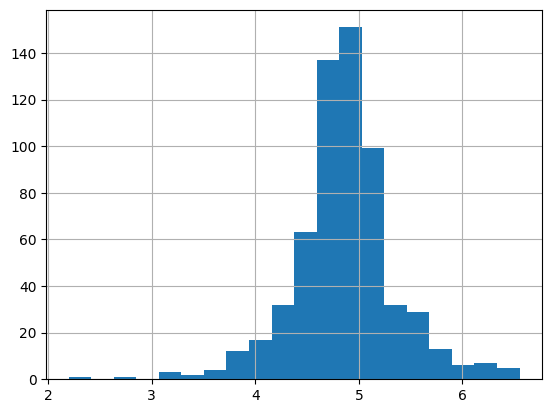

In [28]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])


C:\Users\91890\AppData\Local\Temp\ipykernel_19660\793060716.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)
C:\Users\91890\AppData\Local\Temp\ipykernel_19660\793060716.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[col])
C:\Users\91890\AppData\Local\Temp\ipykernel_19660\793060716.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `h

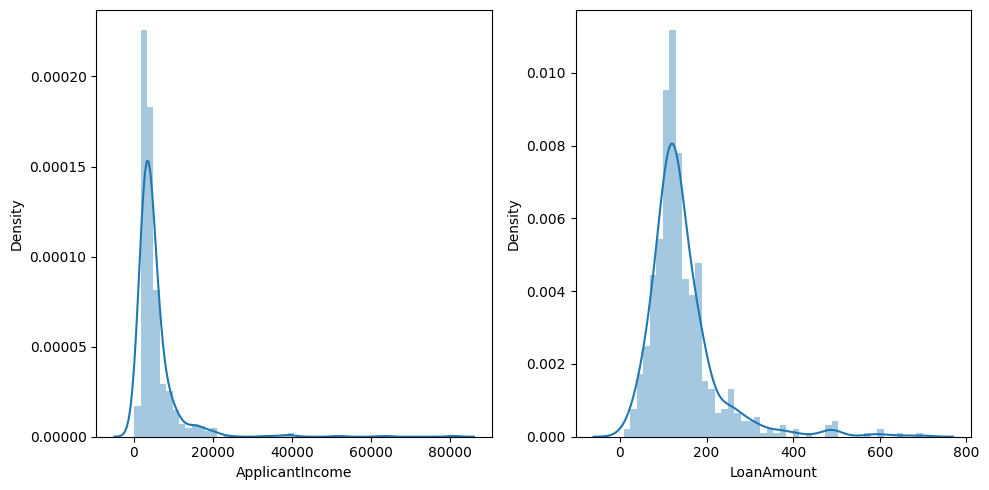

In [29]:
plt.subplots(figsize=(10, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.distplot(train[col])
plt.tight_layout()
plt.show()

In [30]:
train.groupby('Gender').mean()['LoanAmount']


C:\Users\91890\AppData\Local\Temp\ipykernel_19660\4046730195.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('Gender').mean()['LoanAmount']


Gender
Female    126.732143
Male      149.996016
Name: LoanAmount, dtype: float64

In [31]:
train.groupby(['Married', 'Gender']).mean()['LoanAmount']

C:\Users\91890\AppData\Local\Temp\ipykernel_19660\582304444.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby(['Married', 'Gender']).mean()['LoanAmount']


Married  Gender
No       Female    116.412500
         Male      136.338346
Yes      Female    152.531250
         Male      154.918699
Name: LoanAmount, dtype: float64

## Feature Engingeering

In [32]:
# from sklearn.preprocessing import StandardScaler

# std = StandardScaler()
# x_train = std.fit_transform(x_train)
# x_test = std.transform(x_test)

## Model Training

In [33]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing


dfT = train #encode the data - one hot encoding is done

label_encoder = preprocessing.LabelEncoder()
dfT['Property_Area']= label_encoder.fit_transform(dfT['Property_Area'])
dfT['Property_Area'].unique()


dfT["Gender"] = dfT["Gender"].map({"Male" : 0, "Female" : 1})
dfT["Married"] = dfT["Married"].map({"Yes" : 1, "No" : 0})
dfT["Dependents"] = dfT["Dependents"].map({"0" : 0, "1" : 1,"2" : 2,"3+" : 3})
dfT["Education"] = dfT["Education"].map({"Graduate" : 1, "Not Graduate" : 0})
dfT["Self_Employed"] = dfT["Self_Employed"].map({"Yes" : 1, "No" : 0})
#dfT = pd.get_dummies(dfT,columns = ["Property_Area"]) #one hot encoding
dfT["Loan_Status"] = dfT["Loan_Status"].map({"Y" : 1, "N" : 0})


#split dataset
x_train, x_test, y_train, y_test = train_test_split(dfT[dfT.columns[:-1]].values, dfT['Loan_Status'].values, test_size=0.25)


In [35]:
dfT

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,4.852030
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1,4.262680
610,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1,3.688879
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1,5.533389
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1,5.231109


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['Y', 'N']))

              precision    recall  f1-score   support

           Y       1.00      1.00      1.00        54
           N       1.00      1.00      1.00       100

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [37]:
# from sklearn.ensemble import VotingClassifier # this is the function that ensembles my model
# from sklearn.linear_model import LogisticRegression


In [38]:
# x_train

In [39]:
# x_train.shape, x_test.shape

## Max Voting

In [40]:
from sklearn.ensemble import VotingClassifier # this is the function that ensembles my model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier(3)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft') # it will stitich all the models together, voting = hard means max voting 
# we need to give the list of models that we are trying to combine
model.fit(x_train,y_train) # to train all of the models
preds = model.predict(x_test)
model.score(x_test,y_test) # prediction
roc_auc_score(y_test,model.predict_proba(x_test)[:,1])

c:\Users\91890\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [41]:
model3 = KNeighborsClassifier(3)
model3.fit(x_train,y_train)
roc_auc_score(y_test,model3.predict_proba(x_test)[:,1])

0.5798148148148149

In [42]:
from sklearn import preprocessing

dfT1= test 
dfT1

label_encoder = preprocessing.LabelEncoder()
dfT1['Property_Area']= label_encoder.fit_transform(dfT1['Property_Area'])
dfT1['Property_Area'].unique()


array([2, 1, 0])

In [43]:
dfT1= test #encode the data - one hot encoding is done

dfT1["Gender"] = dfT1["Gender"].map({"Male" : 0, "Female" : 1})
dfT1["Married"] = dfT1["Married"].map({"Yes" : 1, "No" : 0})
dfT1["Dependents"] = dfT1["Dependents"].map({"0" : 0, "1" : 1,"2" : 2,"3+" : 3})
dfT1["Education"] = dfT1["Education"].map({"Graduate" : 1, "Not Graduate" : 0})
dfT1["Self_Employed"] = dfT1["Self_Employed"].map({"Yes" : 1, "No" : 0})
#dfT1 = pd.get_dummies(dfT1,columns = ["Property_Area"]) #one hot encoding
#dfT1["Loan_Status"] = dfT1["Loan_Status"].map({"Y" : 1, "N" : 0})

dfT1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,0,1,0,1,0,5720,0,110.0,360.0,1.0,2,4.700480
1,0,1,1,1,0,3076,1500,126.0,360.0,1.0,2,4.836282
2,0,1,2,1,0,5000,1800,208.0,360.0,1.0,2,5.337538
3,0,1,2,1,0,2340,2546,100.0,360.0,1.0,2,4.605170
4,0,0,0,0,0,3276,0,78.0,360.0,1.0,2,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,3,0,1,4009,1777,113.0,360.0,1.0,2,4.727388
363,0,1,0,1,0,4158,709,115.0,360.0,1.0,2,4.744932
364,0,0,0,1,0,3250,1993,126.0,360.0,1.0,1,4.836282
365,0,1,0,1,0,5000,2393,158.0,360.0,1.0,0,5.062595


In [44]:
pred_test = model3.predict(test)


c:\Users\91890\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [45]:
submission=pd.read_csv(r"D:\DataScience\Project\Analytics_Vidya\LoanPrediction\Dataset\sample_submission_49d68Cx.csv")

In [46]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [47]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# submission.drop(header= False, axis=0, inplace=True)

In [49]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('D:\DataScience\Project\Analytics_Vidya\LoanPrediction\Dataset\Loan_pred.csv',index=False)